In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import matplotlib.pyplot as plt
import pandas as pd
import re
import spacy

[nltk_data] Downloading package punkt to /home/oumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/oumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
sculptors = pd.read_csv('biography_sculptor.csv')
sculptors.head()

Category                     Name  \
0  Sculptors           Wäinö Aaltonen   
1  Sculptors  Johannes Josephus Aarts   
2  Sculptors    Magdalena Abakanowicz   
3  Sculptors            Elfriede Abbe   
4  Sculptors            Louise Abbéma   

                                             Content  
0  Wäinö Valdemar Aaltonen (8 March 1894 – 30 May...  
1  Johannes Josephus Aarts (18 August 1871, in Th...  
2  Magdalena Abakanowicz (Polish pronunciation: [...  
3  Elfriede Martha Abbe (February 6, 1919 – Decem...  
4  Louise Abbéma (30 October 1853 – 29 July 1927)...

In [8]:
cs = pd.read_csv('biography_cs.csv')
cs.head()

Category                 Name  \
0  Computer_Scientists  Atta ur Rehman Khan   
1  Computer_Scientists    Wil van der Aalst   
2  Computer_Scientists       Scott Aaronson   
3  Computer_Scientists         Rediet Abebe   
4  Computer_Scientists          Hal Abelson   

                                             Content  
0  Atta ur Rehman Khan (Urdu: عطا الرحمن خان) is ...  
1  Willibrordus Martinus Pancratius van der Aalst...  
2  Scott Joel Aaronson (born May 21, 1981) is an ...  
3  Rediet Abebe (Amharic: ረድኤት አበበ) is an Ethiopi...  
4  Harold Abelson (born April 26, 1947) is an Ame...

In [9]:
def remove_stopwords(dataframe):
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    dataframe['Content'] = dataframe['Content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)])) 
    return dataframe

sculptors = remove_stopwords(sculptors)
sculptors.head()

Category                     Name  \
0  Sculptors           Wäinö Aaltonen   
1  Sculptors  Johannes Josephus Aarts   
2  Sculptors    Magdalena Abakanowicz   
3  Sculptors            Elfriede Abbe   
4  Sculptors            Louise Abbéma   

                                             Content  
0  Wäinö Valdemar Aaltonen (8 March 1894 – 30 May...  
1  Johannes Josephus Aarts (18 August 1871, Hague...  
2  Magdalena Abakanowicz (Polish pronunciation: [...  
3  Elfriede Martha Abbe (February 6, 1919 – Decem...  
4  Louise Abbéma (30 October 1853 – 29 July 1927)...

In [10]:
computer_sc = remove_stopwords(cs)
computer_sc.head()

Category                 Name  \
0  Computer_Scientists  Atta ur Rehman Khan   
1  Computer_Scientists    Wil van der Aalst   
2  Computer_Scientists       Scott Aaronson   
3  Computer_Scientists         Rediet Abebe   
4  Computer_Scientists          Hal Abelson   

                                             Content  
0  Atta ur Rehman Khan (Urdu: عطا الرحمن خان) com...  
1  Willibrordus Martinus Pancratius van der Aalst...  
2  Scott Joel Aaronson (born May 21, 1981) Americ...  
3  Rediet Abebe (Amharic: ረድኤት አበበ) Ethiopian com...  
4  Harold Abelson (born April 26, 1947) American ...

In [11]:
def most_frequent_words(dataframe, n):
    # get most frequent words
    patern = r'[=–]'
    dataframe['Content'] = dataframe['Content'].apply(lambda x: re.sub(patern, ' ', x))
    all_words = ' '.join(dataframe['Content']).split()
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame(fdist.most_common(n), columns=["Word", "Frequency"])
    return words_df


print(most_frequent_words(sculptors, 50))


           Word  Frequency
0           Art        272
1          work        252
2        Museum        203
3          also        197
4         works        172
5           New        166
6           art        147
7            de        142
8    sculptures        128
9     sculpture        127
10        first        112
11   University        105
12     American        100
13         Arts         95
14       artist         94
15         born         92
16         York         91
17     sculptor         90
18      Gallery         90
19         made         86
20          one         84
21          San         84
22   References         83
23        known         80
24         ISBN         78
25          two         74
26      Academy         74
27    Sculpture         72
28        years         71
29     National         68
30   exhibition         67
31         Art,         66
32       public         65
33        links         64
34      created         64
35     External         62
3

In [12]:
print(most_frequent_words(computer_sc, 50))

             Word  Frequency
0      University       2386
1        computer       2273
2            also       1569
3        Computer       1517
4           first       1331
5            work       1237
6         Science       1068
7        research        981
8             one        888
9           Award        884
10       received        833
11    programming        832
12        science        771
13           ISBN        752
14       Research        731
15       American        731
16         became        683
17           John        673
18      Institute        671
19       software        654
20       National        615
21     References        598
22       language        588
23            New        580
24      professor        578
25         worked        566
26         member        564
27      Computing        555
28          known        549
29           used        547
30            ACM        542
31    development        525
32    Information        522
33          wo

### World cloud

In [13]:
from wordcloud import WordCloud
def display_wordcloud(dataframe):
    # display wordcloud
    all_words = ' '.join(dataframe['Content'])
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    return wordcloud
   

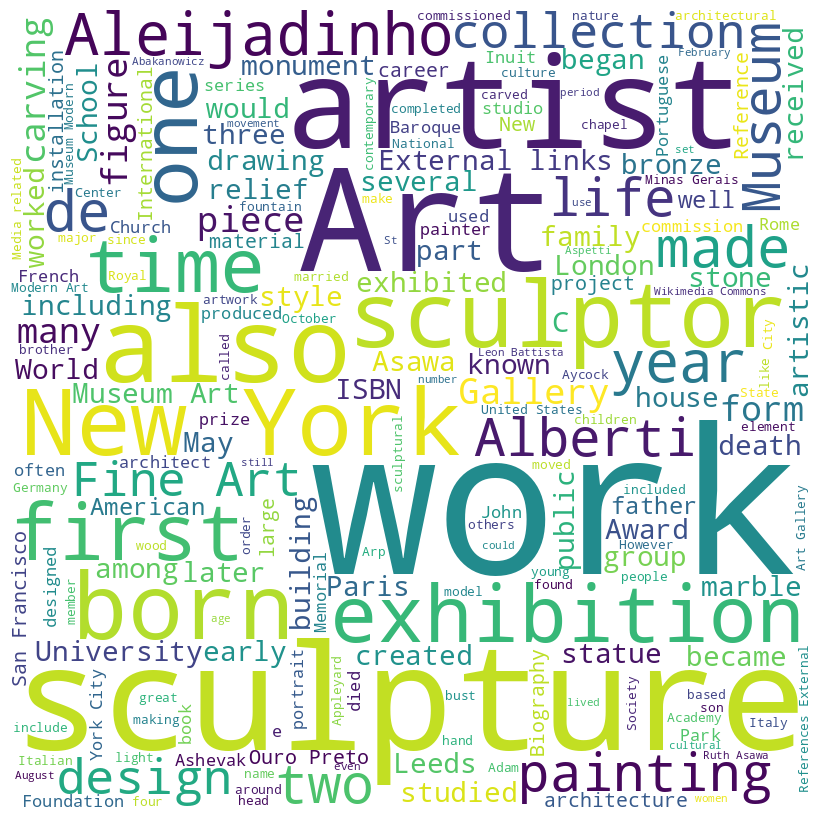

In [14]:
print(display_wordcloud(sculptors))

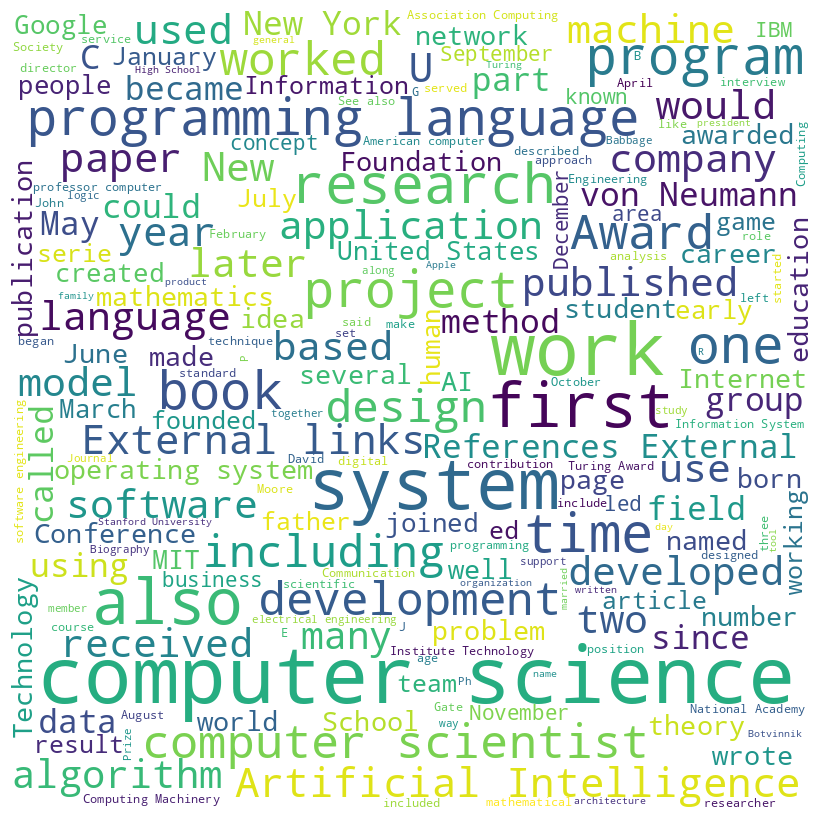

In [15]:
print(display_wordcloud(computer_sc))

### Sentences 
 

In [27]:
def sentence_segmentation(dataframe):
    nlp = spacy.load('en_core_web_sm')
    all_sentences = []
    for i, row in dataframe.iterrows():
        text = nlp(row['Content'])
        sentences = [sent.text for sent in text.sents]
        all_sentences.extend(sentences)
  
    plt.hist([len(sent.split()) for sent in all_sentences], bins=50)
    plt.show()
    plt.boxplot([len(sent.split()) for sent in all_sentences])
    print("Number of sentences: ", len(all_sentences))
    return all_sentences

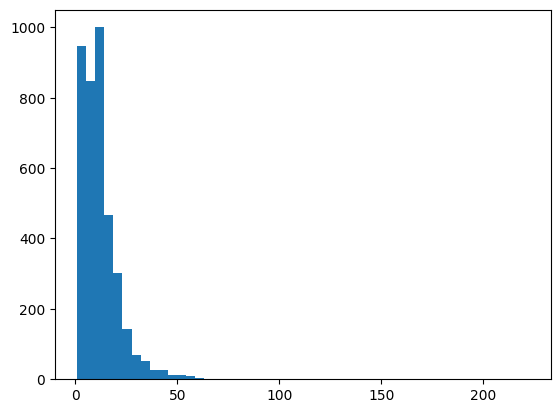

Number of sentences:  3931
['Wäinö Valdemar Aaltonen (8 March 1894   30 May 1966) Finnish artist sculptor.', 'Chambers Biographical Dictionary describes "one leading Finnish sculptors".', 'born tailor village Karinainen, Finland. became interested art deaf child, attended School Drawing Turku Art Association age 16, specifically 1910 1915.', 'spent many early years school studying painting Victor Westerholm, mainly self-taught sculptor.', 'learned technics treatment marble relative Aarre Aaltonen, working trainee stonemason Hirvensalo.', 'Sculptor Felix Nylund substitute teacher art school Turku one season, work inspiration young Aaltonen.', 'journey Aaltonen made Italy 1923 opened eyes cubist futurist art.', 'elements primarily seen paintings.', 'Republic Finland arose, First World War raged, sculpted War Memorials.', 'soon became nationalist icon, exemplar Finn, establishing exhibition Stockholm 1927.', 'sculpture nationalist nature, noted monumental figures busts portraying citizens

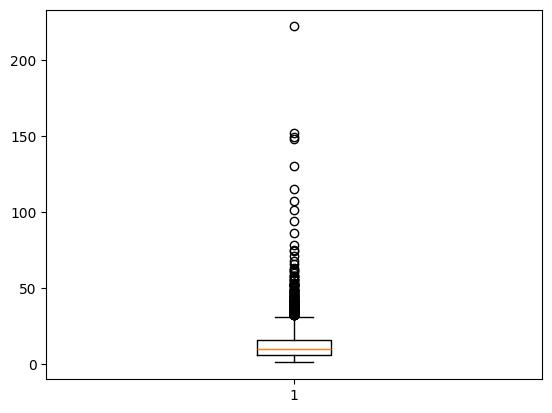

In [28]:
print(sentence_segmentation(sculptors))

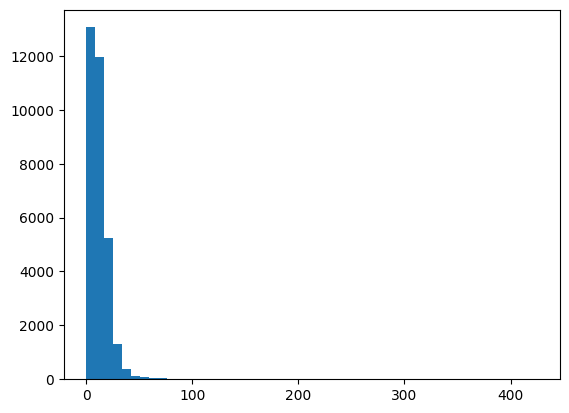

Number of sentences:  32357
['Atta ur Rehman Khan (Urdu: عطا الرحمن خان) computer scientist academician contributed multiple domains field.', "According Stanford University report, among World's Top 2% Scientists.", 'founder National Cyber Crime Forensics Lab Pakistan, operates partnership NR3C. published numerous research articles books.', 'senior member IEEE ACM.    ', 'Education    Khan Bright Sparks scholar received PhD degree Computer Science University Malaya.', "received master's degree bachelor's degree (with honors)", 'Computer Science COMSATS University COMSATS scholarship.', 'also attended summer camp Advance Wireless Networks Technische Universität Ilmenau DAAD scholarship.    ', 'Experience    2010, Khan working associate professor College Engineering Information Technology, Ajman University, United Arab Emirates.', 'experience teaching research different positions served seven universities, namely Sohar University, Air University, King Saud University, COMSATS University,

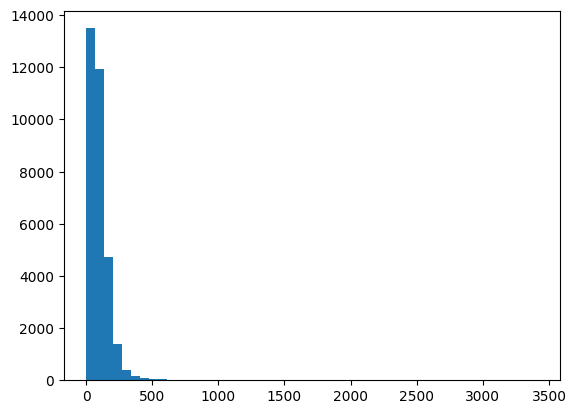

In [26]:
print(sentence_segmentation(computer_sc))

In [36]:
def bigrams(dataframe):
    all_bigrams = []
    dataframe['Content'] = dataframe['Content'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    for i, row in dataframe.iterrows():
        text = nltk.word_tokenize(row['Content'])
        bigrams = list(nltk.bigrams(text))
        all_bigrams.extend(bigrams)
    fdist = nltk.FreqDist(all_bigrams)
    bigrams_df = pd.DataFrame(fdist.most_common(50), columns=["Bigram", "Frequency"])
    return bigrams_df


                    Bigram  Frequency
0              (New, York)        133
1        (External, links)         62
2            (Museum, Art)         52
3             (Fine, Arts)         49
4         (San, Francisco)         48
5            (Ouro, Preto)         47
6                (s, work)         43
7             (York, City)         38
8         (in, Portuguese)         37
9         (United, States)         36
10          (Art, Gallery)         35
11         (Minas, Gerais)         33
12           (Modern, Art)         31
13        (Museum, Modern)         30
14  (References, External)         29
15        (Media, related)         29
16    (Wikimedia, Commons)         29
17             (ISBN, 978)         29
18        (Leon, Battista)         29
19           (Ruth, Asawa)         29
20            (Ashevak, s)         28
21     (Battista, Alberti)         27
22           (Early, life)         26
23           (Art, Museum)         25
24     (National, Gallery)         23
25          

In [37]:
print(bigrams(sculptors))

                    Bigram  Frequency
0              (New, York)        133
1        (External, links)         62
2            (Museum, Art)         52
3             (Fine, Arts)         49
4         (San, Francisco)         48
5            (Ouro, Preto)         47
6                (s, work)         43
7             (York, City)         38
8         (in, Portuguese)         37
9         (United, States)         36
10          (Art, Gallery)         35
11         (Minas, Gerais)         33
12           (Modern, Art)         31
13        (Museum, Modern)         30
14  (References, External)         29
15        (Media, related)         29
16    (Wikimedia, Commons)         29
17             (ISBN, 978)         29
18        (Leon, Battista)         29
19           (Ruth, Asawa)         29
20            (Ashevak, s)         28
21     (Battista, Alberti)         27
22           (Early, life)         26
23           (Art, Museum)         25
24     (National, Gallery)         23
25          

In [38]:
print(bigrams(computer_sc))

                        Bigram  Frequency
0          (computer, science)        812
1          (Computer, Science)        711
2            (External, links)        474
3        (computer, scientist)        462
4                  (ISBN, 978)        381
5       (References, External)        366
6                  (New, York)        348
7      (programming, language)        336
8                    (doi, 10)        324
9                      (Ph, D)        289
10              (von, Neumann)        269
11            (United, States)        261
12  (Artificial, Intelligence)        261
13     (Institute, Technology)        226
14                   (ISBN, 0)        219
15      (Computing, Machinery)        217
16         (National, Academy)        217
17    (Association, Computing)        213
18  (artificial, intelligence)        212
19                 (See, also)        194
20    (programming, languages)        192
21                      (U, S)        184
22             (Turing, Award)    